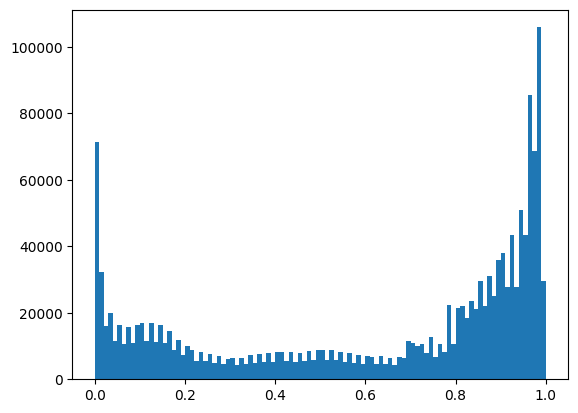

In [35]:
from skimage import io, img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np


img = img_as_float(io.imread('i.jpg'))
plt.hist(img.flat, bins= 100 , range = (0,1))
plt.show()


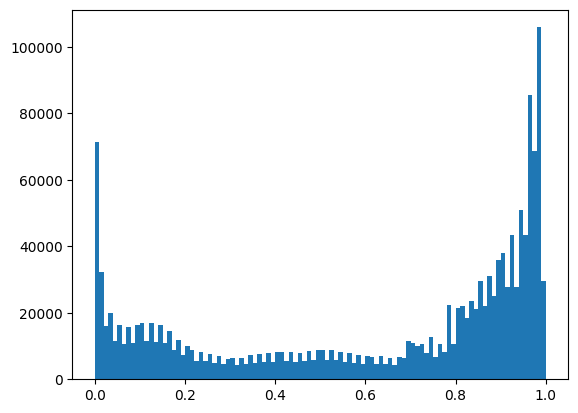

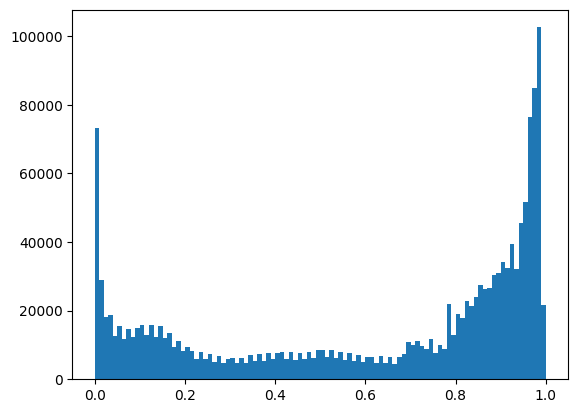

In [42]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd
from skimage.restoration import denoise_nl_means, estimate_sigma


img = img_as_float(io.imread('i.jpg'))
plt.hist(img.flat, bins= 100 , range = (0,1))
plt.show()

sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
nlm = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)
plt.hist(nlm.flat, bins= 100 , range = (0,1))
plt.show()

In [43]:
#equalize_adapthist

In [44]:
from skimage import exposure

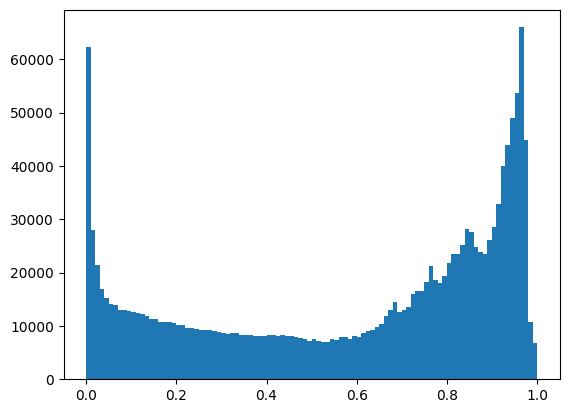

In [45]:
eq_img = exposure.equalize_adapthist(nlm)
plt.hist(eq_img.flat, bins =100, range=(0,1))

plt.show()

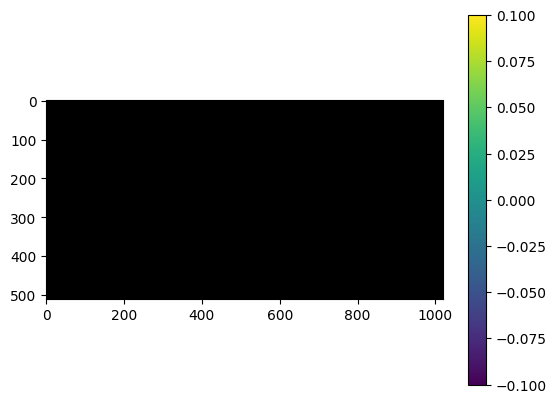

In [54]:
markers = np.zeros(img.shape, dtype = np.uint)
markers[(eq_img > 0.3) & (eq_img < 0.6)] 
markers[(eq_img > 0.8) & (eq_img < 0.99)]
plt.imshow(markers, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference
plt.show()

dt float64


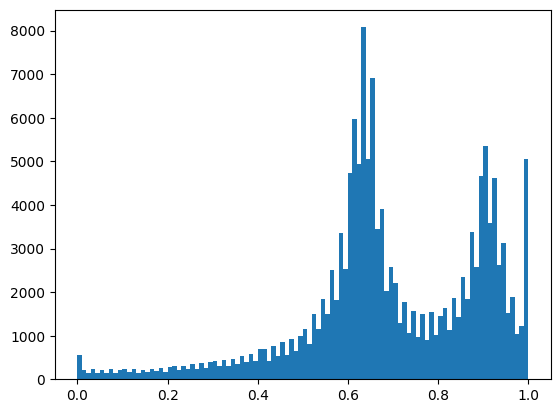

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


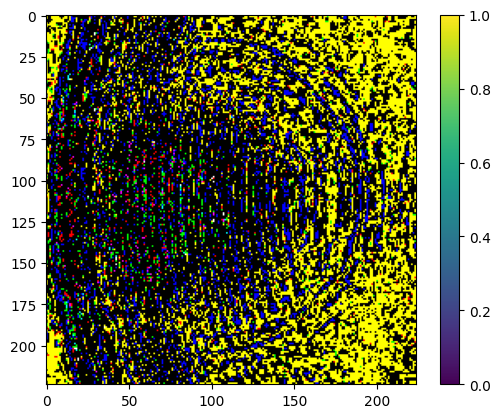

In [79]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float, img_as_ubyte
import numpy as np


img = img_as_float(io.imread("ng.jpg"))
print('dt',img.dtype)
plt.hist(img.flat, bins=100, range=(0, 1)) 

plt.show()


from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3,channel_axis=-1)

from skimage import exposure   #Contains functions for hist. equalization
eq_img = exposure.equalize_adapthist(img)
markers = np.zeros(img.shape, dtype=np.float64)

markers[(eq_img < 0.65) & (eq_img > 0.55)] = 2
markers[(eq_img > 0.0) & (eq_img < 0.0)] = 1

plt.imshow(markers, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference
plt.show()

In [102]:
from skimage.segmentation import random_walker

labels = random_walker(eq_img, markers, beta=10 , mode ='bf' )

#labels_rescaled = labels.astype(float) / labels.max()


#plt.imshow(labels_rescaled)


In [114]:
seg1 = (labels == 1)
seg2 = (labels == 2 )

alls = np.zeros((eq_img.shape[0], eq_img.shape[1], 3), dtype=np.float64)

alls[seg1] = [1, 0, 0]  # Assigning RGB color (red)
alls[seg2] = [0, 1, 0]  # Assigning RGB color (green)



plt.imshow(alls)

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 32284 output values where the mask is true